In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1

#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | daru
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | poya
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | kampot
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | bandrele
Processi

Processing Record 37 of Set 4 | henties bay
Processing Record 38 of Set 4 | watford
Processing Record 39 of Set 4 | jambi
Processing Record 40 of Set 4 | townsville
Processing Record 41 of Set 4 | bairiki
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | flagstaff
Processing Record 45 of Set 4 | san jeronimo
Processing Record 46 of Set 4 | lasa
Processing Record 47 of Set 4 | banjar
Processing Record 48 of Set 4 | belyy yar
Processing Record 49 of Set 4 | wajir
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | mogadishu
Processing Record 2 of Set 5 | oum hadjer
Processing Record 3 of Set 5 | santa marta
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | areka
Processing Record 6 of Set 5 | agirish
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | kaspi
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | aberdeen
Processing Record 11 of Set 5 | ulaanbaatar


Processing Record 28 of Set 8 | nagapattinam
Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | clyde river
Processing Record 32 of Set 8 | taiyuan
Processing Record 33 of Set 8 | saint-francois
Processing Record 34 of Set 8 | tifton
Processing Record 35 of Set 8 | cherskiy
Processing Record 36 of Set 8 | vostok
Processing Record 37 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 8 | gumusyaka
City not found. Skipping...
Processing Record 39 of Set 8 | yiyang
Processing Record 40 of Set 8 | koumac
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | russell
Processing Record 43 of Set 8 | davila
Processing Record 44 of Set 8 | tunduma
Processing Record 45 of Set 8 | lagoa
Processing Record 46 of Set 8 | kawalu
Processing Record 47 of Set 8 | saint-joseph
Processing Record 48 of Set 8 | chagda
City not found. Skipping...
Processing Record 49 of Set 8 | palabuhanratu

Processing Record 13 of Set 12 | praia
Processing Record 14 of Set 12 | podor
Processing Record 15 of Set 12 | saint george
Processing Record 16 of Set 12 | kyra
Processing Record 17 of Set 12 | almere
Processing Record 18 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 19 of Set 12 | lata
Processing Record 20 of Set 12 | omutinskoye
City not found. Skipping...
Processing Record 21 of Set 12 | samana
Processing Record 22 of Set 12 | sooke
Processing Record 23 of Set 12 | manyana
Processing Record 24 of Set 12 | taguatinga
Processing Record 25 of Set 12 | tuatapere
Processing Record 26 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 27 of Set 12 | speightstown
Processing Record 28 of Set 12 | xghajra
City not found. Skipping...
Processing Record 29 of Set 12 | chara
Processing Record 30 of Set 12 | tarakan
Processing Record 31 of Set 12 | mukhen
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | terme
Processing R

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Daru,-9.0763,143.2092,81.73,75,91,11.74,PG,2021-04-15 01:22:40
1,Qaanaaq,77.4840,-69.3632,-11.43,65,0,7.34,GL,2021-04-15 01:22:41
2,Rikitea,-23.1203,-134.9692,78.51,69,9,5.08,PF,2021-04-15 01:22:41
3,Bluff,-46.6000,168.3333,60.01,80,58,4.00,NZ,2021-04-15 01:22:41
4,Poya,-21.3500,165.1500,79.68,82,100,5.95,NC,2021-04-15 01:22:42
5,Kampot,10.6167,104.1833,82.40,83,0,4.61,KH,2021-04-15 01:22:42
6,Busselton,-33.6500,115.3333,61.00,89,44,4.88,AU,2021-04-15 01:22:43
7,Ushuaia,-54.8000,-68.3000,41.00,60,40,6.91,AR,2021-04-15 01:22:43
8,Puerto Ayora,-0.7393,-90.3518,76.35,89,18,3.96,EC,2021-04-15 01:22:43
9,Hobart,-42.8794,147.3294,57.20,51,20,24.16,AU,2021-04-15 01:22:44


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Daru,PG,2021-04-15 01:22:40,-9.0763,143.2092,81.73,75,91,11.74
1,Qaanaaq,GL,2021-04-15 01:22:41,77.4840,-69.3632,-11.43,65,0,7.34
2,Rikitea,PF,2021-04-15 01:22:41,-23.1203,-134.9692,78.51,69,9,5.08
3,Bluff,NZ,2021-04-15 01:22:41,-46.6000,168.3333,60.01,80,58,4.00
4,Poya,NC,2021-04-15 01:22:42,-21.3500,165.1500,79.68,82,100,5.95
5,Kampot,KH,2021-04-15 01:22:42,10.6167,104.1833,82.40,83,0,4.61
6,Busselton,AU,2021-04-15 01:22:43,-33.6500,115.3333,61.00,89,44,4.88
7,Ushuaia,AR,2021-04-15 01:22:43,-54.8000,-68.3000,41.00,60,40,6.91
8,Puerto Ayora,EC,2021-04-15 01:22:43,-0.7393,-90.3518,76.35,89,18,3.96
9,Hobart,AU,2021-04-15 01:22:44,-42.8794,147.3294,57.20,51,20,24.16


In [12]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

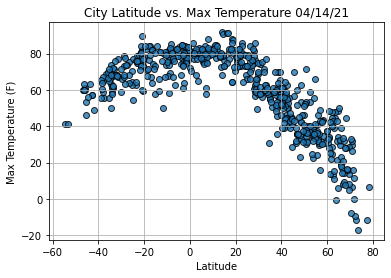

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

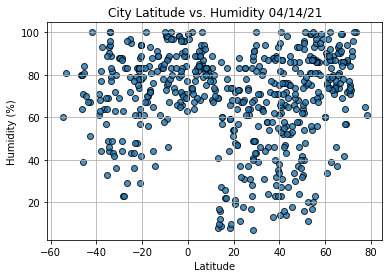

In [15]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig2.png")
#Show plot.
plt.show()

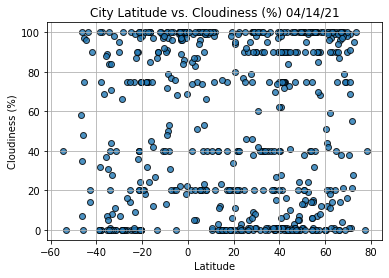

In [16]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig3.png")
#Show plot.
plt.show()

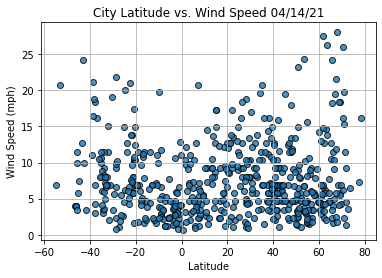

In [17]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig4.png")
#Show plot.
plt.show()

In [18]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Country                        AU
Date          2021-04-15 01:22:45
Lat                      -24.8667
Lng                       113.633
Max Temp                    77.07
Humidity                       43
Cloudiness                      0
Wind Speed                  20.04
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2021-04-15 01:22:41,77.4840,-69.3632,-11.43,65,0,7.34
5,Kampot,KH,2021-04-15 01:22:42,10.6167,104.1833,82.40,83,0,4.61
12,Mehamn,NO,2021-04-15 01:22:45,71.0357,27.8492,29.46,75,99,15.39
14,Victoria,HK,2021-04-15 01:21:18,22.2855,114.1577,73.00,88,100,1.01
19,Adrar,MR,2021-04-15 01:22:48,20.5022,-10.0711,75.22,19,11,11.95


In [21]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

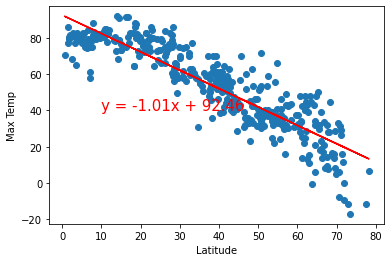

In [22]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

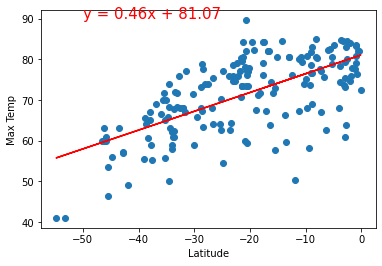

In [23]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

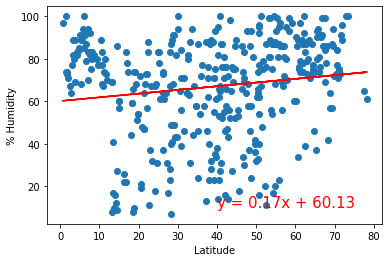

In [24]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

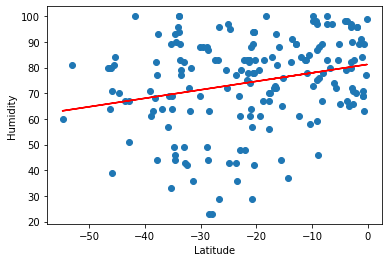

In [25]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'Humidity',(-50,15))

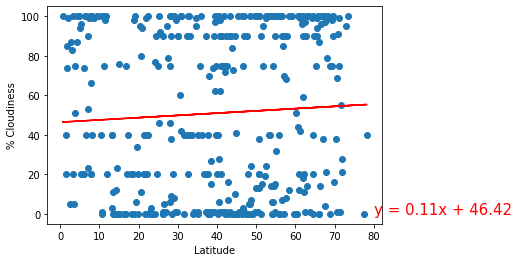

In [26]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(80,0))

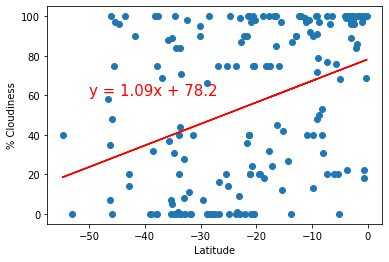

In [27]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

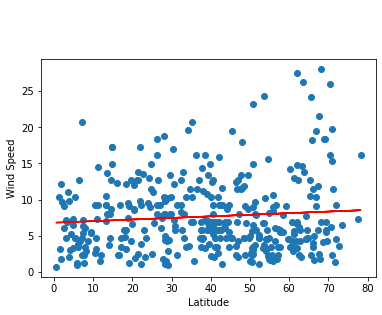

In [28]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

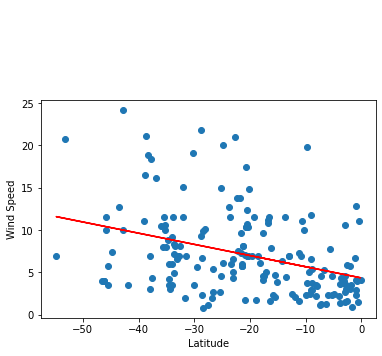

In [29]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))